# Calibración con lente de fresnel binaria


**Autor**: Luis Miguel Sánchez Brea.

**Fecha**: 29/06/2019.

**Objetivo**: calibración

**Descripción**: Enviamos varias lentes de fresnel binarias con niveles (0,n) donde n está entre (0 y 255) y vemos la potencia en el foco.

* Nos vamos al foco de la lente
* Generamos lentes de fresnel binarias con 2 niveles (0,n) 
* sacamos la curva de potencia
* Comparamos con la curva teórica



## Parámetros

### Cargar librerías

In [1]:
%run config_jupyter.ipynb

In [2]:
import time
from pprint import pprint
import cv2
import screeninfo
import matplotlib.image as mpimg


In [3]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_masks_XY import Scalar_mask_XY

In [4]:
from py_slm.smc100 import SMC100
import py_slm.camera.tisgrabber as IC
from py_slm.py_slm import SLM
from py_slm.config import CONF_HOLOEYE2500, CONF_PACKARD_BELL, CONF_IMAGING_SOURCE
from py_slm.config import wavelength, z_ini

In [5]:
s=1.

### Cargar motor

In [6]:
smc100 = SMC100(1, 'COM3', silent=True)

Connecting to SMC100 on COM3


In [7]:
smc100.set_velocity(20*mm/s, check=True)


(20.0, 20.0)


In [8]:
smc100.home()

In [9]:
smc100.move_absolute(z_ini)
smc100.get_position(verbose=True)

distance = 116.3000 mm


116300

### Cargar modulador

In [10]:
import screeninfo
screeninfo.get_monitors()

[monitor(1440x900+0+0), monitor(1024x768+1440+0)]

In [11]:
slm=SLM(config_SLM=CONF_HOLOEYE2500, config_Camera=CONF_IMAGING_SOURCE)

x0=slm.x0
y0=slm.y0
wavelength=slm.wavelength
print(x0.shape, y0.shape)

((1024L,), (768L,))


## Definir y lente

horizontal


(<Figure size 360x324 with 2 Axes>,
 <matplotlib.image.AxesImage at 0xe2129b0>)

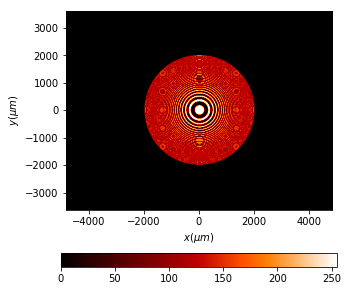

In [33]:
focal=100*mm
t_bfzp=Scalar_mask_XY(slm.x0, slm.y0, slm.wavelength)
t_bfzp.fresnel_lens(r0=(0,0), radius=(2*mm,2*mm), focal=(focal,focal), levels=(np.sqrt(255),0), kind='amplitude', phase=0,
                     angle=0 * degrees, mask=True)
t_bfzp.draw(kind='intensity', has_colorbar='horizontal')

In [32]:
smc100.move_absolute(z_ini-150*mm)


In [34]:
slm.mask_to_rawImage(mask_XY=t_bfzp, kind='intensity', normalize=False);
slm.send_image_screen()
cv2.waitKey(500)


-1

In [13]:
def get_fondo(level=0):
    t_fondo.one_level(level=level)

    "Creamos la imagen a partir de la máscara creada."
    slm.mask_to_rawImage(mask_XY=t_fondo, kind='intensity', normalize=True);
    "Enviamos la imagen al SLM."
    slm.send_image_screen()
    cv2.waitKey(500)
    slm.camera1.SnapImage()
    cv2.waitKey(500)
    image_fondo = slm.camera1.GetImage()
    cv2.waitKey(500)
    intensidad=(image_fondo[:,:,0])
    intensidad.shape
    intensidad = intensidad.astype('float') 
    
    return intensidad
    

In [14]:
image_fondo=get_fondo(level=0)

In [15]:
def intensidad_media(intensidad, verbose=True):
    intensidad_media=intensidad.sum()/(len(slm.x0)*len(slm.y0))
    if verbose is True:
        print(intensidad)
    return intensidad_media

(255.0, 19.0)


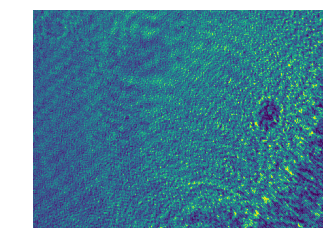

In [16]:
plt.figure()
plt.imshow(image_fondo)
plt.axis('off');

print(image_fondo.max(), image_fondo.min())

### acondicionar camara

In [43]:
slm.camera1.SetPropertySwitch("Gain", "Auto", 0)
slm.camera1.SetPropertySwitch("Exposure", "Auto", 0)

1

In [ ]:
slm.camera1.SetPropertyValue("Gain", "Value", 3)
slm.camera1.SetPropertyValue("Exposure", "Value", -2)

### Captura del foco

In [19]:
name='calibracion_fondo'

In [31]:
niveles=np.linspace(0,1,25)
intensidades_media=np.zeros_like(niveles,dtype=float)
print(niveles)
print(intensidades_media.shape)

[0.         0.04166667 0.08333333 0.125      0.16666667 0.20833333
 0.25       0.29166667 0.33333333 0.375      0.41666667 0.45833333
 0.5        0.54166667 0.58333333 0.625      0.66666667 0.70833333
 0.75       0.79166667 0.83333333 0.875      0.91666667 0.95833333
 1.        ]
(25L,)


In [37]:
for i, i_nivel in enumerate(niveles):
    image_fondo=get_fondo(level=i_nivel)
    i_media=intensidad_media(image_fondo, verbose=False)
    intensidades_media[i]=i_media
    print(i, i_media)
    

(0, 228.39760208129883)
(1, 228.39500300089517)
(2, 228.3821233113607)
(3, 228.36141077677408)
(4, 228.2370630900065)
(5, 227.9193967183431)
(6, 227.09404373168945)
(7, 224.96621958414713)
(8, 219.87284723917642)
(9, 211.9267667134603)
(10, 198.20219548543295)
(11, 181.10005696614584)
(12, 160.91833368937174)
(13, 134.51928075154623)
(14, 107.49836730957031)
(15, 82.35368728637695)
(16, 61.92064412434896)
(17, 47.240431467692055)
(18, 34.79640452067057)
(19, 32.96218744913737)
(20, 44.52460606892904)
(21, 68.69701385498047)
(22, 107.16598892211914)
(23, 163.7676798502604)
(24, 225.57825215657553)


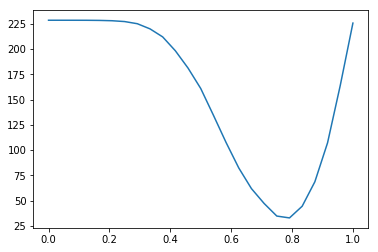

In [39]:
plt.figure()
plt.plot(niveles,intensidades_media)

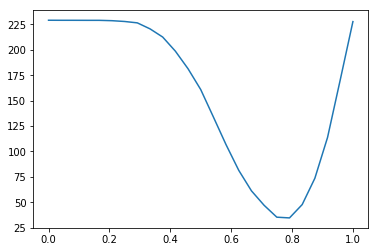

In [33]:
plt.figure()
plt.plot(niveles,intensidades_media)

## Imagen de cuadrados

(<Figure size 360x324 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x16808588>)

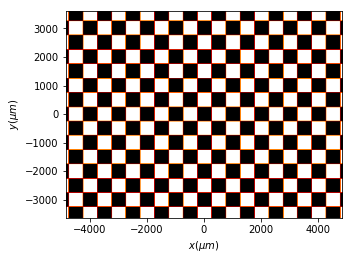

In [40]:
t_2d = Scalar_mask_XY(slm.x0, slm.y0, slm.wavelength)
t_2d.grating_2D_ajedrez(period=1*mm, amin=0,   amax=1., phase=0,
                   x0=0, fill_factor=0.5,   angle=0.0 * degrees)
t_2d.draw(kind='intensity')

In [46]:
slm.mask_to_rawImage(mask_XY=t_2d, kind='intensity', normalize=True);
slm.send_image_screen() #"Enviamos la imagen al SLM."
cv2.waitKey(500)

-1

In [47]:
image_fondo=get_fondo(level=0.74)


NameError: name 'get_fondo' is not defined

## Cerrar

In [199]:
smc100.close()

In [200]:
Camera.StopLive()

0